In [104]:
import pandas as pd
import numpy as np

In [105]:
X = pd.read_csv("../data/forecasts_for_ml/X.csv").values
y = pd.read_csv("../data/forecasts_for_ml/y.csv")
X_final = pd.read_csv("../data/forecasts_for_ml/X_final.csv").values

In [106]:
estimators = []

In [107]:
print(f"note: we have {len(y)} records\n {round(1/6, 3)} we have a class imbalance issue maybe fix ")
y.value_counts() / len(y)
y = y.values.ravel()

note: we have 273500 records
 0.167 we have a class imbalance issue maybe fix 


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 1.49555555,  0.14925294, -0.15844484, ..., -1.09818609,
         1.27931657, -1.22139096],
       [-1.50103377,  0.14925294, -0.15844484, ..., -1.09818609,
         1.27931657, -1.22139096],
       [-1.00160222,  0.14925294, -0.15844484, ..., -1.09818609,
         1.27931657, -1.22139096],
       ...,
       [ 0.49669244,  1.08765938,  1.35675318, ...,  0.66098144,
         0.93398943,  0.52669165],
       [ 0.99612399,  1.08765938,  1.35675318, ...,  0.66098144,
         0.93398943,  0.52669165],
       [ 1.49555555,  1.08765938,  1.35675318, ...,  0.66098144,
         0.93398943,  0.52669165]])

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [110]:
# Benchmark
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=5e3)
logit.fit(X_train, y_train)
estimators.append(('logistic', logit))
yhat = logit.predict(X_test)

In [111]:
sum(yhat == y_test) / len(yhat)

0.2625019587359624

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [113]:
mean_cv_score = []
kval = []

# for nieghbors in range(150, 250, 100):
#     knn = KNeighborsClassifier(n_neighbors=nieghbors)
#     cv = cross_val_score(knn, X_train, y_train, cv=3)
#     mean_cv_score.append(np.mean(cv).round(3))
#     kval.append(nieghbors)


In [114]:
knn = KNeighborsClassifier(n_neighbors=200)
estimators.append(('knn', knn))
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

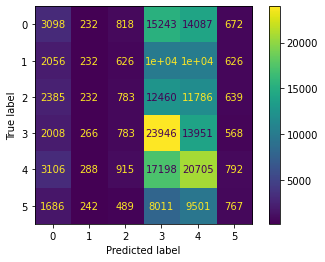

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()

In [116]:
from xgboost import XGBClassifier

In [117]:
xgboost = XGBClassifier()
estimators.append(('xgb', xgboost))
xgboost.fit(X_train, y_train)
yhat = xgboost.predict(X_test)
p = xgboost.predict_proba(X_test)
probs_df = pd.DataFrame(p, columns=xgboost.classes_)

In [118]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)
sum(yhat == y_test) / len(yhat)

0.28200052232959

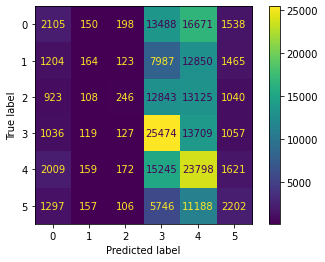

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()


In [126]:
from sklearn.model_selection import KFold
param_grid = {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        'colsample_bytree': np.arange(0.1,1.0,0.01)
}

In [127]:
kfold = KFold(n_splits=3, shuffle=True, random_state=10)

In [128]:
param_grid

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'min_child_weight': array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
        6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
        1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
        1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
        2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
        3.010e-02, 3.110e-02, 3.210e-02, 3.310e-02, 3.410e-02, 3.510e-02,
        3.610e-02, 3.710e-02, 3.810e-02, 3.910e-02, 4.010e-02, 4.110e-02,
        4.210e-02, 4.310e-02, 4.410e-02, 4.510e-02, 4.610e-02, 4.710e-02,
        4.810e-02, 4.910e-02, 5.010e-02, 5.110e-02, 5.210e-02, 5.310e-02,
        5.410e-02, 5.510e-02, 5.610e-02, 5.710e-02, 5.810e-02, 5.910e-02,
        6.010e-02, 6.110e-02, 6.210e-02, 6.310e-02, 6.410e-02, 6.510e-02,
        6.610e-02, 6.710e-02, 6.810e-02, 6.910e-02, 7.010e-02, 7.110e-02,
        7.210e-02, 7.310e-02, 7.410e-02, 7.

In [131]:
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(model, param_grid, scoring="accuracy", n_iter = 500, cv=kfold, verbose=10)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV 1/3; 1/500] START colsample_bylevel=0.0, colsample_bytree=0.13999999999999999, gamma=23.46, learning_rate=0.23550000000000001, max_depth=6, min_child_weight=0.10110000000000001, subsample=0.35000000000000003
[CV 1/3; 1/500] END colsample_bylevel=0.0, colsample_bytree=0.13999999999999999, gamma=23.46, learning_rate=0.23550000000000001, max_depth=6, min_child_weight=0.10110000000000001, subsample=0.35000000000000003;, score=nan total time=   0.2s
[CV 2/3; 1/500] START colsample_bylevel=0.0, colsample_bytree=0.13999999999999999, gamma=23.46, learning_rate=0.23550000000000001, max_depth=6, min_child_weight=0.10110000000000001, subsample=0.35000000000000003
[CV 2/3; 1/500] END colsample_bylevel=0.0, colsample_bytree=0.13999999999999999, gamma=23.46, learning_rate=0.23550000000000001, max_depth=6, min_child_weight=0.10110000000000001, subsample=0.35000000000000003;, score=nan total time=   0.2s
[CV 3/3; 1/500] START colsampl

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
import joblib

# save
joblib.dump(grid_search, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")
